## importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Reading and cleaning

In [2]:
dataset = pd.read_csv("train.csv")

In [3]:
dataset.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
dataset["Age"] = dataset["Age"].astype(int)

In [5]:
null = dataset.isnull().sum()
null

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [6]:
((null)/len(dataset)) * 100

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.034115
Academic Pressure                        80.172708
Work Pressure                            19.842217
CGPA                                     80.171997
Study Satisfaction                       80.172708
Job Satisfaction                         19.836532
Sleep Duration                            0.000000
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                     

In [7]:
dataset.duplicated().sum()

np.int64(0)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  int64  
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [9]:
df = dataset.copy()
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


The null values dropped in the columns below were very small so would not affect the dataset much

In [10]:
df = df.dropna(subset="Dietary Habits").dropna(subset="Degree").dropna(subset="Financial Stress")

In [11]:
null = df.isnull().sum()
(null/len(df)) * 100

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.030279
Academic Pressure                        80.174853
Work Pressure                            19.840074
CGPA                                     80.174142
Study Satisfaction                       80.174853
Job Satisfaction                         19.834388
Sleep Duration                            0.000000
Dietary Habits                            0.000000
Degree                                    0.000000
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.000000
Family History of Mental Illness          0.000000
Depression                     

In [12]:
df.drop(["Profession", "Name", "City"], axis= 1, inplace=True)

### Dietary Habits

In [13]:
df["Dietary Habits"].value_counts()

Dietary Habits
Moderate             49704
Unhealthy            46224
Healthy              44739
Yes                      2
More Healthy             2
No                       2
Pratham                  1
Gender                   1
BSc                      1
Less than Healthy        1
3                        1
1.0                      1
Hormonal                 1
Electrician              1
Mihir                    1
No Healthy               1
Less Healthy             1
M.Tech                   1
Vegas                    1
Male                     1
Indoor                   1
Class 12                 1
2                        1
Name: count, dtype: int64

The entries of the `Dietary Habits` column which are not in `Healthy, Moderate, Unhealthy` do not make sense as entries into that column.Modifying all entriese that are not in the above listed range to be `Moderate`.

In [14]:
for item in df["id"]:    
    if df.loc[item, "Dietary Habits"] not in ["Moderate", "Unhealthy", "Healthy"]:        
        df.loc[item, "Dietary Habits"] = "Moderate"                

In [15]:
df["Dietary Habits"].value_counts()

Dietary Habits
Moderate     49727
Unhealthy    46224
Healthy      44739
Name: count, dtype: int64

### Degree

In [ ]:
df["Degree"].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
       'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
       'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
       'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
   

In [17]:
degree_count = df["Degree"].value_counts()
degree_count[degree_count > 200]

Degree
Class 12    14728
B.Ed        11690
B.Arch       8742
B.Com        8113
B.Pharm      5856
BCA          5738
M.Ed         5668
MCA          5234
BBA          5030
BSc          5027
MSc          4879
LLM          4647
M.Pharm      4536
M.Tech       4475
B.Tech       4424
LLB          4348
BHM          4305
MBA          3817
BA           3750
ME           3631
MD           3383
MHM          3286
BE           3104
PhD          3103
M.Com        3094
MBBS         3081
MA           2887
Name: count, dtype: int64

Going to replace all counts that are less than 2000 with `Other`

In [18]:
degree_lower_than_2000 = degree_count[degree_count < 2000].index
for item in df["id"]:    
    if df.loc[item, "Degree"] in degree_lower_than_2000:        
        df.loc[item, "Degree"] = "Other"

In [19]:
df["Degree"].value_counts()

Degree
Class 12    14728
B.Ed        11690
B.Arch       8742
B.Com        8113
B.Pharm      5856
BCA          5738
M.Ed         5668
MCA          5234
BBA          5030
BSc          5027
MSc          4879
LLM          4647
M.Pharm      4536
M.Tech       4475
B.Tech       4424
LLB          4348
BHM          4305
MBA          3817
BA           3750
ME           3631
MD           3383
MHM          3286
BE           3104
PhD          3103
M.Com        3094
MBBS         3081
MA           2887
Other         114
Name: count, dtype: int64

### Sleep Duration

In [ ]:
df["Sleep Duration"].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [21]:
sleep = df["Sleep Duration"].value_counts()
sleep

Sleep Duration
Less than 5 hours    38781
7-8 hours            36968
More than 8 hours    32724
5-6 hours            32138
3-4 hours               12
6-7 hours                8
4-5 hours                7
4-6 hours                5
2-3 hours                5
6-8 hours                4
No                       4
1-6 hours                4
10-11 hours              2
9-11 hours               2
8-9 hours                2
Sleep_Duration           2
Unhealthy                2
45                       2
40-45 hours              1
1-2 hours                1
1-3 hours                1
9-6 hours                1
55-66 hours              1
Moderate                 1
35-36 hours              1
8 hours                  1
10-6 hours               1
Indore                   1
than 5 hours             1
49 hours                 1
Work_Study_Hours         1
3-6 hours                1
45-48 hours              1
9-5                      1
Pune                     1
9-5 hours                1
Name: count, 

The durations with value counts less than 30000 are all going to be replaced with `Other` since they form a very small minority and some durations are not feasible for sleep durations.Some entries are also not valid like `Pune` or `Moderate` so all of those would be converted into `Other`

In [22]:
lower_sleep = sleep[sleep < 3000]
for item in df["id"]:    
    if df.loc[item, "Sleep Duration"] in lower_sleep:        
        df.loc[item, "Sleep Duration"] = "Other"        

In [23]:
df["Sleep Duration"].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Other'], dtype=object)

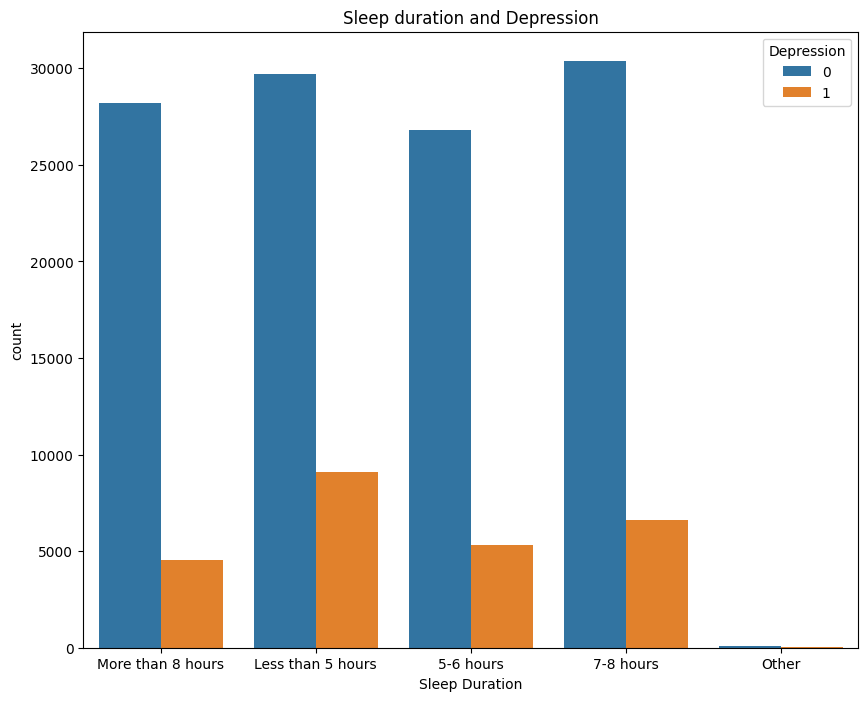

In [24]:
plt.figure(figsize=(10, 8))
sns.countplot(df, x="Sleep Duration", hue="Depression")
plt.title("Sleep duration and Depression")
plt.show()

Depression was highest in people who had `Less than 5 hours` of sleep and least in people who had `More than 8 hours` of sleep

### Gender

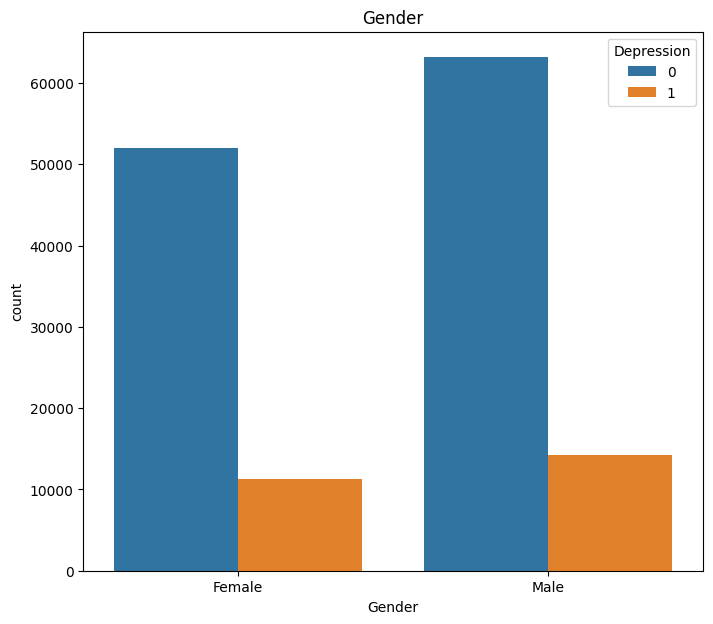

In [ ]:
plt.figure(figsize=(8, 7))
sns.countplot(df, x="Gender", hue="Depression")
plt.title("Gender")
plt.show()

There are more `Males` than `Females` in the dataset.Less people are depressed than the people who are depressed.

### Depression

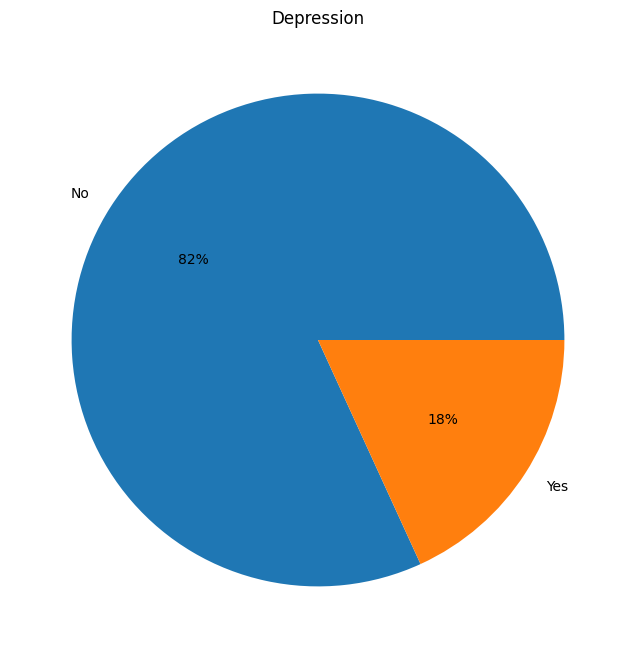

In [26]:
count_depression = df["Depression"].value_counts()
count_depression_index = count_depression.index
labels = {0 : "No",
          1 : "Yes"}
labels = count_depression_index.map(labels)
plt.figure(figsize=(8, 8))
plt.pie(count_depression.values, labels=labels, autopct="%1.f%%")
plt.title("Depression")
plt.show()

This shows at least `80%` of the dataset is not depressed

### Age

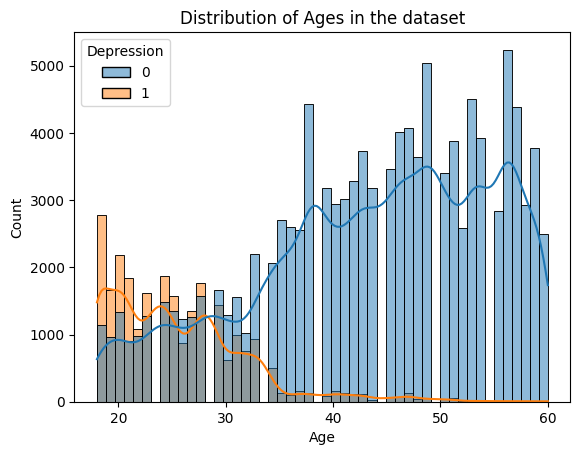

In [27]:
sns.histplot(df, x="Age", kde=True, hue="Depression")
plt.title("Distribution of Ages in the dataset")
plt.show()

In [28]:
min_age, max_age = int(df["Age"].min()), int(df["Age"].max())
age_ranges = [x for x in range(min_age , max_age, 8)]
age_labels = [f"{age_ranges[x]} - {age_ranges[x+1]}" if x != len(age_ranges[:-1]) - 1 else f"{age_ranges[x]} - {max_age}" for x in range(len(age_ranges[:-1]))]
ages = pd.cut(df["Age"], bins=age_ranges, labels=age_labels, include_lowest=True)
copy = df.copy()
copy["Age_range"] = ages

In [ ]:
copy.head()

,id,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Age_range
0,0,Female,49,Working Professional,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,42 - 50
1,1,Male,26,Working Professional,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,18 - 26
2,2,Male,33,Student,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,26 - 34
3,3,Male,22,Working Professional,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,18 - 26
4,4,Female,30,Working Professional,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,26 - 34


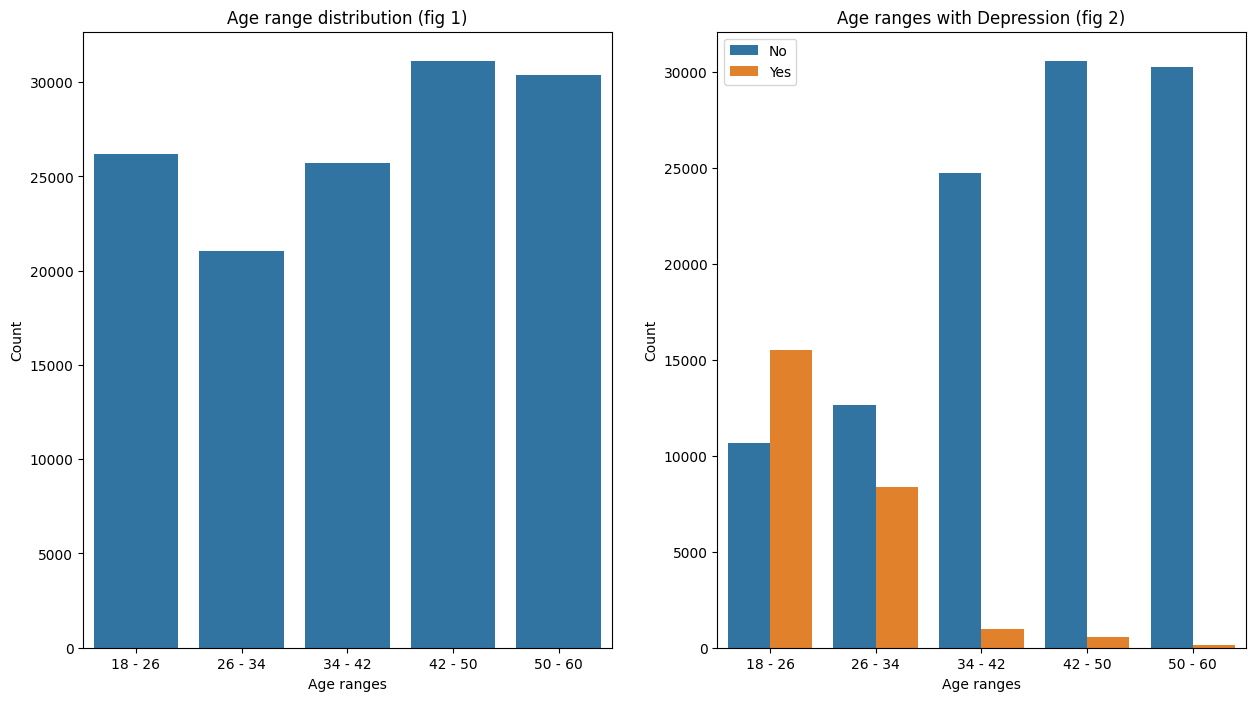

In [30]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(copy, x="Age_range")
plt.xlabel("Age ranges")
plt.ylabel("Count")
plt.title("Age range distribution (fig 1)")
plt.subplot(1, 2, 2)
sns.countplot(copy, x="Age_range", hue="Depression")
plt.xlabel("Age ranges")
plt.ylabel("Count")
plt.legend(["No", "Yes"])
plt.title("Age ranges with Depression (fig 2)")
plt.show()

Most of the enteries into the data are of the older ages based on `fig 1`Issues of depression are more prevalent in the younger years according to `fig 2`This shows that people of the younger ages have a higher tendency of being depressed as compared to people of the older ages

## Breaking database into students and professionals to inspect them separately

In [31]:
students = df[df["Working Professional or Student"] == "Student"]
professionals = df[df["Working Professional or Student"] != "Student"]

### Students

#### Student Job Satisfaction and Academic Pressure

In [32]:
students[students["Job Satisfaction"].notna()]

,id,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1428,1428,Male,29,Student,3.0,NaN,9.63,3.0,3.0,7-8 hours,Moderate,M.Pharm,No,8.0,5.0,No,0
21880,21880,Male,38,Student,NaN,5.0,NaN,NaN,4.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0
70453,70453,Female,20,Student,NaN,NaN,NaN,NaN,2.0,Less than 5 hours,Moderate,Class 12,Yes,12.0,3.0,Yes,1
75007,75007,Male,21,Student,NaN,2.0,NaN,NaN,1.0,7-8 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,0
105773,105773,Male,18,Student,NaN,NaN,NaN,NaN,1.0,Less than 5 hours,Moderate,Class 12,Yes,9.0,5.0,No,1
116703,116703,Male,25,Student,4.0,NaN,9.44,5.0,2.0,Less than 5 hours,Unhealthy,PhD,Yes,4.0,1.0,No,1
129756,129756,Male,18,Student,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,Class 12,Yes,9.0,4.0,No,1
134830,134830,Female,24,Student,NaN,NaN,NaN,NaN,2.0,More than 8 hours,Unhealthy,Class 12,No,0.0,5.0,No,0


Ideally a student should not have a job value under `Job Satisfaction` and `Work Pressure`.It can be noticed that there exists some few student enteries that contain a value either under  `Job Satisfaction` or `Work Pressure` or may contain both.The instance of `id 1428` and `id 116703` can be considered to be students since they possess a value under the all columns necessary for students.The rest of these enteries are not convincing enough to be classified as either a student or a worker so I'll be dropping those entries

In [33]:
dropping = students[(students["Job Satisfaction"].notna()) & (students["Academic Pressure"].isna())]
dropping = dropping["id"].tolist()
students.drop(index=dropping, inplace=True)

In [34]:
students[students["CGPA"].isna()]

,id,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
52737,52737,Male,28,Student,3.0,NaN,NaN,4.0,NaN,Less than 5 hours,Healthy,BBA,No,12.0,2.0,No,0
58062,58062,Female,32,Student,5.0,NaN,NaN,NaN,NaN,Less than 5 hours,Unhealthy,Class 12,Yes,11.0,5.0,No,1
110097,110097,Male,34,Student,1.0,NaN,NaN,5.0,NaN,Less than 5 hours,Unhealthy,M.Ed,Yes,10.0,3.0,Yes,0


In [36]:
students["Job Satisfaction"] = np.nan

Assuming students should not have `Job satisfaction` because they are students

In [37]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27890 entries, 2 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27890 non-null  int64  
 1   Gender                                 27890 non-null  object 
 2   Age                                    27890 non-null  int64  
 3   Working Professional or Student        27890 non-null  object 
 4   Academic Pressure                      27887 non-null  float64
 5   Work Pressure                          0 non-null      float64
 6   CGPA                                   27887 non-null  float64
 7   Study Satisfaction                     27886 non-null  float64
 8   Job Satisfaction                       0 non-null      float64
 9   Sleep Duration                         27890 non-null  object 
 10  Dietary Habits                         27890 non-null  object 
 11  Degree

In [38]:
students.head()

,id,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,2,Male,33,Student,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,8,Female,24,Student,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,26,Male,31,Student,3.0,NaN,7.03,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
30,30,Female,28,Student,3.0,NaN,5.59,2.0,NaN,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
32,32,Female,25,Student,4.0,NaN,8.13,3.0,NaN,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [39]:
students[students["Job Satisfaction"].notna()]

,id,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


In [40]:
students.isnull().sum()

id                                           0
Gender                                       0
Age                                          0
Working Professional or Student              0
Academic Pressure                            3
Work Pressure                            27890
CGPA                                         3
Study Satisfaction                           4
Job Satisfaction                         27890
Sleep Duration                               0
Dietary Habits                               0
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Depression                                   0
dtype: int64

In [41]:
mean_cgpa = students["CGPA"].mean()
mode_study_satisfaction = students["Study Satisfaction"].mode()[0]
mode_academic_pressure = students["Academic Pressure"].mode()[0]
students["Academic Pressure"].fillna(mode_academic_pressure, inplace=True)
students["Study Satisfaction"].fillna(mode_study_satisfaction, inplace=True)
students["CGPA"].fillna(mean_cgpa, inplace=True)

In [42]:
students.isnull().sum()

id                                           0
Gender                                       0
Age                                          0
Working Professional or Student              0
Academic Pressure                            0
Work Pressure                            27890
CGPA                                         0
Study Satisfaction                           0
Job Satisfaction                         27890
Sleep Duration                               0
Dietary Habits                               0
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Depression                                   0
dtype: int64

### Professionals

In [43]:
professionals[professionals["Academic Pressure"].notna()]

,id,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
18752,18752,Female,18,Working Professional,2.0,NaN,8.14,5.0,NaN,Less than 5 hours,Healthy,Class 12,Yes,7.0,1.0,Yes,1
41915,41915,Male,18,Working Professional,4.0,NaN,8.04,3.0,NaN,5-6 hours,Healthy,Class 12,Yes,1.0,5.0,Yes,1
55827,55827,Female,19,Working Professional,3.0,NaN,8.11,2.0,NaN,5-6 hours,Unhealthy,Class 12,Yes,4.0,4.0,No,1
99062,99062,Female,24,Working Professional,4.0,NaN,5.42,4.0,NaN,Less than 5 hours,Moderate,B.Ed,Yes,1.0,5.0,No,1
101189,101189,Male,34,Working Professional,4.0,NaN,8.24,3.0,NaN,More than 8 hours,Moderate,MD,No,11.0,1.0,No,0


The information above containing enteries on working professionals seems more like these entries are students than professionals.These entries will be edited and transformed into students and added to the students table.

In [44]:
professionals

,id,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Female,49,Working Professional,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Male,26,Working Professional,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
3,3,Male,22,Working Professional,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Female,30,Working Professional,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Female,59,Working Professional,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140694,140694,Female,45,Working Professional,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,B.Ed,Yes,1.0,5.0,No,0
140695,140695,Female,18,Working Professional,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Female,41,Working Professional,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Female,24,Working Professional,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0


In [45]:
professionals[professionals["Study Satisfaction"].notna()]

,id,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
18752,18752,Female,18,Working Professional,2.0,NaN,8.14,5.0,NaN,Less than 5 hours,Healthy,Class 12,Yes,7.0,1.0,Yes,1
41915,41915,Male,18,Working Professional,4.0,NaN,8.04,3.0,NaN,5-6 hours,Healthy,Class 12,Yes,1.0,5.0,Yes,1
55827,55827,Female,19,Working Professional,3.0,NaN,8.11,2.0,NaN,5-6 hours,Unhealthy,Class 12,Yes,4.0,4.0,No,1
60348,60348,Male,29,Working Professional,NaN,NaN,9.72,2.0,NaN,5-6 hours,Moderate,B.Ed,No,7.0,2.0,Yes,0
99062,99062,Female,24,Working Professional,4.0,NaN,5.42,4.0,NaN,Less than 5 hours,Moderate,B.Ed,Yes,1.0,5.0,No,1
101189,101189,Male,34,Working Professional,4.0,NaN,8.24,3.0,NaN,More than 8 hours,Moderate,MD,No,11.0,1.0,No,0


In [46]:
one = professionals[professionals["Study Satisfaction"].notna()]
one["Working Professinoal or Student"] = one["Working Professional or Student"].str.replace("Working Professional", "Student")
one["Academic Pressure"].fillna(mode_academic_pressure, inplace=True)
one = one["id"].tolist()

This entry is more likely to be a student with the only missing value being academic pressure.I will fill the academic pressure and alter the profession.

In [47]:
extra_students = professionals[professionals["Academic Pressure"].notna()]
drop_id = extra_students["id"].tolist()
drop_id = drop_id + one
professionals.drop(index=drop_id, inplace=True)
extra_students["Working Professional or Student"] = extra_students["Working Professional or Student"].str.replace("Working Professional", "Student")
students = pd.concat([students, extra_students])

In [48]:
professionals

,id,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Female,49,Working Professional,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Male,26,Working Professional,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
3,3,Male,22,Working Professional,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Female,30,Working Professional,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Female,59,Working Professional,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140694,140694,Female,45,Working Professional,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,B.Ed,Yes,1.0,5.0,No,0
140695,140695,Female,18,Working Professional,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Female,41,Working Professional,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Female,24,Working Professional,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0


### Create two new columns called `Satisfaction` and `Pressure` to hold both types of satisfaction and pressure for both `Students` and `Professionals` to reduce the null values

In [49]:
students["Satisfaction"] = students["Study Satisfaction"]
students["Pressure"] = students["Academic Pressure"]
students = students.drop(["Academic Pressure", "Work Pressure", "Study Satisfaction", "Job Satisfaction"], axis=1)

In [50]:
professionals["Satisfaction"] = professionals["Job Satisfaction"]
professionals["Pressure"] = professionals["Work Pressure"]
professionals.drop(["Academic Pressure", "Work Pressure", "Study Satisfaction", "Job Satisfaction"], axis=1, inplace=True)

In [51]:
stud_dep = students["Depression"]
students.drop(["Depression"], axis=1, inplace=True)
students["Depression"] = stud_dep

In [52]:
prof_dep = professionals["Depression"]
professionals.drop(["Depression"], axis=1, inplace=True)
professionals["Depression"] = prof_dep

Making sure the last column is `Depression`

In [53]:
professionals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112788 entries, 0 to 140698
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     112788 non-null  int64  
 1   Gender                                 112788 non-null  object 
 2   Age                                    112788 non-null  int64  
 3   Working Professional or Student        112788 non-null  object 
 4   CGPA                                   0 non-null       float64
 5   Sleep Duration                         112788 non-null  object 
 6   Dietary Habits                         112788 non-null  object 
 7   Degree                                 112788 non-null  object 
 8   Have you ever had suicidal thoughts ?  112788 non-null  object 
 9   Work/Study Hours                       112788 non-null  float64
 10  Financial Stress                       112788 non-null  float

In [54]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27895 entries, 2 to 101189
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27895 non-null  int64  
 1   Gender                                 27895 non-null  object 
 2   Age                                    27895 non-null  int64  
 3   Working Professional or Student        27895 non-null  object 
 4   CGPA                                   27895 non-null  float64
 5   Sleep Duration                         27895 non-null  object 
 6   Dietary Habits                         27895 non-null  object 
 7   Degree                                 27895 non-null  object 
 8   Have you ever had suicidal thoughts ?  27895 non-null  object 
 9   Work/Study Hours                       27895 non-null  float64
 10  Financial Stress                       27895 non-null  float64
 11  Family

In [55]:
professionals[professionals["Satisfaction"].isna()]

,id,Gender,Age,Working Professional or Student,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Satisfaction,Pressure,Depression
25647,25647,Male,57,Working Professional,NaN,Less than 5 hours,Unhealthy,Class 12,No,4.0,1.0,No,NaN,1.0,0
34694,34694,Female,46,Working Professional,NaN,5-6 hours,Moderate,Class 12,Yes,12.0,3.0,No,NaN,NaN,0
35612,35612,Male,27,Working Professional,NaN,Less than 5 hours,Unhealthy,B.Pharm,No,11.0,3.0,No,NaN,NaN,1
52199,52199,Male,50,Working Professional,NaN,5-6 hours,Unhealthy,Class 12,No,1.0,3.0,Yes,NaN,4.0,0
55222,55222,Female,21,Working Professional,NaN,7-8 hours,Moderate,B.Arch,No,11.0,2.0,Yes,NaN,5.0,0
57196,57196,Female,20,Working Professional,NaN,Less than 5 hours,Moderate,Class 12,No,0.0,4.0,Yes,NaN,NaN,1
65346,65346,Female,18,Working Professional,NaN,5-6 hours,Moderate,Class 12,Yes,9.0,5.0,No,NaN,5.0,1
86020,86020,Female,19,Working Professional,NaN,Less than 5 hours,Moderate,Class 12,Yes,8.0,4.0,Yes,NaN,1.0,1
98446,98446,Female,54,Working Professional,NaN,More than 8 hours,Moderate,Class 12,Yes,0.0,4.0,No,NaN,NaN,0
100868,100868,Male,29,Working Professional,NaN,More than 8 hours,Healthy,BHM,Yes,10.0,3.0,No,NaN,NaN,0


In [56]:
professionals["Satisfaction"].fillna(professionals["Satisfaction"].mode()[0], inplace=True)
professionals["Pressure"].fillna(professionals["Pressure"].mode()[0], inplace=True)

In [57]:
professionals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112788 entries, 0 to 140698
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     112788 non-null  int64  
 1   Gender                                 112788 non-null  object 
 2   Age                                    112788 non-null  int64  
 3   Working Professional or Student        112788 non-null  object 
 4   CGPA                                   0 non-null       float64
 5   Sleep Duration                         112788 non-null  object 
 6   Dietary Habits                         112788 non-null  object 
 7   Degree                                 112788 non-null  object 
 8   Have you ever had suicidal thoughts ?  112788 non-null  object 
 9   Work/Study Hours                       112788 non-null  float64
 10  Financial Stress                       112788 non-null  float

## Model making and training

### Concatenating the Dataframes together to make the final training dataframe

In [58]:
data = pd.concat([professionals, students])

In [59]:
data

,id,Gender,Age,Working Professional or Student,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Satisfaction,Pressure,Depression
0,0,Female,49,Working Professional,NaN,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,2.0,5.0,0
1,1,Male,26,Working Professional,NaN,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,3.0,4.0,1
3,3,Male,22,Working Professional,NaN,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0,5.0,1
4,4,Female,30,Working Professional,NaN,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,1.0,1.0,0
5,5,Female,59,Working Professional,NaN,5-6 hours,Healthy,MCA,No,7.0,5.0,No,5.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18752,18752,Female,18,Student,8.14,Less than 5 hours,Healthy,Class 12,Yes,7.0,1.0,Yes,5.0,2.0,1
41915,41915,Male,18,Student,8.04,5-6 hours,Healthy,Class 12,Yes,1.0,5.0,Yes,3.0,4.0,1
55827,55827,Female,19,Student,8.11,5-6 hours,Unhealthy,Class 12,Yes,4.0,4.0,No,2.0,3.0,1
99062,99062,Female,24,Student,5.42,Less than 5 hours,Moderate,B.Ed,Yes,1.0,5.0,No,4.0,4.0,1


In [60]:
data = data.sort_index()

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140683 entries, 0 to 140699
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140683 non-null  int64  
 1   Gender                                 140683 non-null  object 
 2   Age                                    140683 non-null  int64  
 3   Working Professional or Student        140683 non-null  object 
 4   CGPA                                   27895 non-null   float64
 5   Sleep Duration                         140683 non-null  object 
 6   Dietary Habits                         140683 non-null  object 
 7   Degree                                 140683 non-null  object 
 8   Have you ever had suicidal thoughts ?  140683 non-null  object 
 9   Work/Study Hours                       140683 non-null  float64
 10  Financial Stress                       140683 non-null  float

In [62]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,140683.0,70348.423697,40617.438287,0.00,35172.50,70349.00,105523.50,140699.0
Age,140683.0,40.390061,12.383830,18.00,29.00,42.00,51.00,60.0
CGPA,27895.0,7.658596,1.464384,5.03,6.29,7.77,8.92,10.0
Work/Study Hours,140683.0,6.252603,3.853624,0.00,3.00,6.00,10.00,12.0
Financial Stress,140683.0,2.988954,1.413648,1.00,2.00,3.00,4.00,5.0
Satisfaction,140683.0,2.968589,1.405193,1.00,2.00,3.00,4.00,5.0
Pressure,140683.0,3.027281,1.401904,1.00,2.00,3.00,4.00,5.0
Depression,140683.0,0.181685,0.385586,0.00,0.00,0.00,0.00,1.0


### Test Preparation

In [63]:
test = pd.read_csv("test.csv")

In [64]:
test = test.drop(["Name", "City"], axis=1)

In [65]:
test["Satisfaction"] = [x if x > 0 else y for x, y in zip(test["Job Satisfaction"], test["Study Satisfaction"])]
test["Pressure"] = [x if x > 0 else y for x, y in zip(test["Work Pressure"], test["Academic Pressure"])]
test.drop(["Academic Pressure", "Work Pressure", "Study Satisfaction", "Job Satisfaction"], axis=1, inplace=True)

In [66]:
id = test["id"] - test["id"].min()

In [67]:
test["id"] = id

In [68]:
test["Sleep Duration"].unique()

array(['Less than 5 hours', '7-8 hours', 'More than 8 hours', '5-6 hours',
       '0', 'Meerut', '9-5 hours', '6-7 hours', '60-65 hours', 'Vivan',
       '3-4 hours', '1-6 hours', '9-5', 'Unhealthy', '8-9 hours',
       '4-5 hours', 'than 5 hours', '9-6 hours', '1-2 hours',
       '8-89 hours', 'Have_you_ever_had_suicidal_thoughts', '20-21 hours',
       '10-6 hours', '1-3 hours', '6 hours', '50-75 hours', '4-6 hours',
       '2-3 hours', '9-11 hours', '9-10 hours', '3-6 hours'], dtype=object)

In [69]:
test_sleep = test["Sleep Duration"].value_counts()
test_lower_sleep = test_sleep[test_sleep < 3000]

In [70]:
test_degree_count = test["Degree"].value_counts()
test_degree_count[test_degree_count > 200]
test_degree_lower_than_2000 = test_degree_count[test_degree_count < 2000].index

In [71]:
for item in test["id"]:    
    if test.loc[item, "Dietary Habits"] not in ["Moderate", "Unhealthy", "Healthy"]:        
        test.loc[item, "Dietary Habits"] = "Moderate"
    if test.loc[item, "Degree"] in test_degree_lower_than_2000:
        test.loc[item, "Degree"] = "Other"
    if test.loc[item, "Sleep Duration"] in test_lower_sleep:
        test.loc[item, "Sleep Duration"] = "Other"        

In [72]:
test["Sleep Duration"].unique()

array(['Less than 5 hours', '7-8 hours', 'More than 8 hours', '5-6 hours',
       'Other'], dtype=object)

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140683 entries, 0 to 140699
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140683 non-null  int64  
 1   Gender                                 140683 non-null  object 
 2   Age                                    140683 non-null  int64  
 3   Working Professional or Student        140683 non-null  object 
 4   CGPA                                   27895 non-null   float64
 5   Sleep Duration                         140683 non-null  object 
 6   Dietary Habits                         140683 non-null  object 
 7   Degree                                 140683 non-null  object 
 8   Have you ever had suicidal thoughts ?  140683 non-null  object 
 9   Work/Study Hours                       140683 non-null  float64
 10  Financial Stress                       140683 non-null  float

In [75]:
data.drop("id", axis=1, inplace=True)

In [76]:
data.select_dtypes("object")

,Gender,Working Professional or Student,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
0,Female,Working Professional,More than 8 hours,Healthy,BHM,No,No
1,Male,Working Professional,Less than 5 hours,Unhealthy,LLB,Yes,No
2,Male,Student,5-6 hours,Healthy,B.Pharm,Yes,No
3,Male,Working Professional,Less than 5 hours,Moderate,BBA,Yes,Yes
4,Female,Working Professional,5-6 hours,Unhealthy,BBA,Yes,Yes
...,...,...,...,...,...,...,...
140695,Female,Working Professional,5-6 hours,Unhealthy,Class 12,No,Yes
140696,Female,Working Professional,7-8 hours,Moderate,B.Tech,Yes,Yes
140697,Female,Working Professional,More than 8 hours,Moderate,B.Com,No,No
140698,Female,Working Professional,5-6 hours,Moderate,ME,Yes,No


In [77]:
gender = le.fit_transform(data["Gender"])
working_professional = le.fit_transform(data["Working Professional or Student"])
sleep_duration = le.fit_transform(data["Sleep Duration"])
dietary_habits = le.fit_transform(data["Dietary Habits"])
degree = le.fit_transform(data["Degree"])
suicidal = le.fit_transform(data["Have you ever had suicidal thoughts ?"])
history = le.fit_transform(data["Family History of Mental Illness"])

In [78]:
data["Gender"] = gender
data["Working Professional or Student"] = working_professional
data["Sleep Duration"] = sleep_duration
data["Dietary Habits"] = dietary_habits
data["Degree"] = degree
data["Have you ever had suicidal thoughts ?"] = suicidal
data["Family History of Mental Illness"] = history

In [79]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [82]:
from xgboost import XGBClassifier
xgm = XGBClassifier()

In [83]:
xgm.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [84]:
from sklearn.metrics import accuracy_score
pred = xgm.predict(x_test)
accuracy_score(pred, y_test)

0.9375910722536163

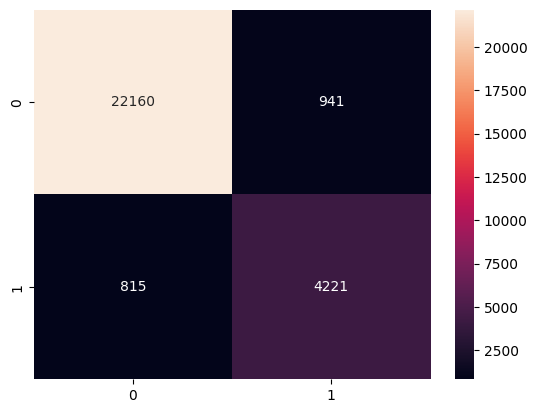

In [85]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(pred, y_test), annot=True, fmt="1")
plt.show()

The training is looking good so far.Training the model on the rest of the dataset for maximum model performance

In [86]:
xgm.fit(x, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [87]:
t_gender = le.fit_transform(test["Gender"])
t_working_professional = le.fit_transform(test["Working Professional or Student"])
t_sleep_duration = le.fit_transform(test["Sleep Duration"])
t_dietary_habits = le.fit_transform(test["Dietary Habits"])
t_degree = le.fit_transform(test["Degree"])
t_suicidal = le.fit_transform(test["Have you ever had suicidal thoughts ?"])
t_history = le.fit_transform(test["Family History of Mental Illness"])
test["Gender"] = t_gender
test["Working Professional or Student"] = t_working_professional
test["Sleep Duration"] = t_sleep_duration
test["Dietary Habits"] = t_dietary_habits
test["Degree"] = t_degree
test["Have you ever had suicidal thoughts ?"] = t_suicidal
test["Family History of Mental Illness"] = t_history
test.drop("Profession", axis=1, inplace=True)

In [88]:
test.drop(["id"], axis=1, inplace=True)

In [89]:
test

,Gender,Age,Working Professional or Student,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Satisfaction,Pressure
0,1,53.0,1,NaN,2,1,12,0,9.0,3.0,1,5.0,2.0
1,0,58.0,1,NaN,2,1,2,0,6.0,4.0,0,4.0,2.0
2,1,53.0,1,NaN,1,1,0,1,12.0,4.0,0,1.0,4.0
3,0,23.0,0,6.84,3,1,10,1,10.0,4.0,0,1.0,5.0
4,1,47.0,1,NaN,1,1,7,1,3.0,4.0,0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,0,49.0,1,NaN,2,1,10,1,2.0,2.0,1,5.0,3.0
93796,1,29.0,1,NaN,1,1,8,1,11.0,3.0,1,1.0,5.0
93797,1,24.0,0,7.51,1,1,4,0,7.0,1.0,0,4.0,1.0
93798,0,23.0,1,NaN,0,0,5,1,7.0,5.0,1,2.0,4.0


In [90]:
test_pred = xgm.predict(test)

In [91]:
submission = pd.read_csv("sample_submission.csv")

In [92]:
submission["Depression"] = test_pred

In [93]:
submission.to_csv("Submission.csv", index=False)